<a href="https://colab.research.google.com/github/TheLittleJimmy/CBB750/blob/main/Part1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

## Read Data into Dataframes

In [180]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [181]:
import pandas as pd

In [182]:
data_path='/content/drive/MyDrive/BIS550_CBB750/project/Code by message type.xlsx'
data_xl=pd.ExcelFile(data_path)
categories=data_xl.sheet_names  # get all sheet names/categories
print('\n'.join(categories))

Info Giving - Patient
Info Giving - Clinician
Info Giving - Auto
Info Seek - Clinician
Info Seek - Patient
Emotion - Patient
Emotion - Clinician
Partnership - Clinician
Partnership - Patient
SDM - Patient
SDM - Clinician


In [183]:
cat_msg={} # a dictionary that stores 'category name':dataframe
for cat in categories:
  cat_msg[cat]=pd.read_excel(data_xl,sheet_name=cat)

In [184]:
cat_msg['Info Giving - Auto'].head()

,Quotation Content,Codes
0,Appointment Information: Visit Type: MyChart V...,Auto
1,Appointment Information: Visit Type: Phone Con...,Auto
2,Appointment Information: Visit Type: Phone Con...,Auto
3,Appointment Information Department: at 6 Devin...,Auto
4,Appointment Information: Visit Type: Phone Con...,Auto


## Sequence Count and Length Visualization by Category

In [185]:
cat_seq_cnt={}
for cat in categories:
  cat_seq_cnt[cat]=cat_msg[cat].shape[0]
cat_seq_cnt

{'Info Giving - Patient': 62,
 'Info Giving - Clinician': 55,
 'Info Giving - Auto': 42,
 'Info Seek - Clinician': 3,
 'Info Seek - Patient': 58,
 'Emotion - Patient': 20,
 'Emotion - Clinician': 12,
 'Partnership - Clinician': 6,
 'Partnership - Patient': 12,
 'SDM - Patient': 2,
 'SDM - Clinician': 3}

In [186]:
def get_word_count(seq):
  return len(seq.split(' '))

In [187]:
cat_seq_len={}
for cat in categories:
  cat_seq_len[cat]=list(cat_msg[cat]["Quotation Content"].apply(get_word_count))

In [188]:
colors=["salmon","salmon","salmon","khaki","khaki","limegreen","limegreen","steelblue","steelblue","darkviolet","darkviolet"]
cat_color=dict(zip(categories,colors))

<ipython-input-189-b7da1d0a4afa>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=cat_seq_cnt.keys(),rotation=90)


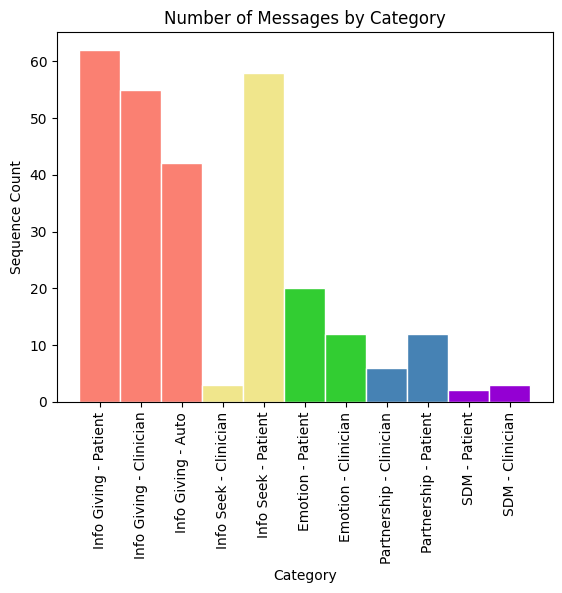

In [189]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(cat_seq_cnt.keys(), cat_seq_cnt.values(), width=1, edgecolor='white', color=cat_color.values())
ax.set_xticklabels(labels=cat_seq_cnt.keys(),rotation=90)
ax.set_xlabel("Category")
ax.set_ylabel("Sequence Count")
ax.set_title("Number of Messages by Category")
plt.show()

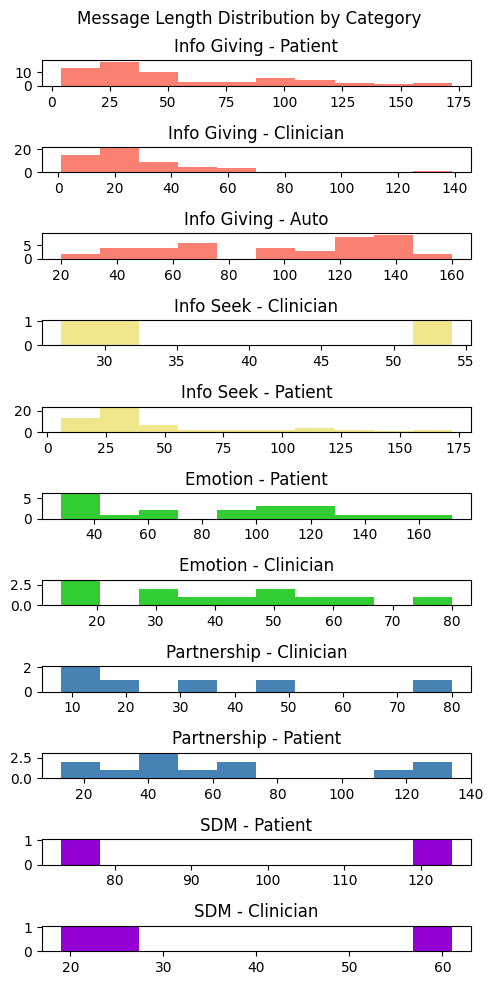

In [190]:
fig,axs=plt.subplots(len(categories),1,figsize=(5,10))
#fig.figsize=(20,10)
row=0
for cat in cat_seq_len.keys():
  axs[row].hist(cat_seq_len[cat],color=cat_color[cat])
  axs[row].set_title(cat)
  row+=1
#ax.set_xticklabels(labels=cat_seq_cnt.keys(),rotation=90)
#ax.set_xlabel("Category")
#ax.set_ylabel("Sequence Count")
#plt.subplots_adjust(hspace=2)
fig.suptitle("Message Length Distribution by Category")
plt.tight_layout()
plt.show()

## Top Keywords by Category

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [192]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [193]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [194]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [195]:
def generate_wordcloud(category,additional_stopwords):
  df=cat_msg[category]['Quotation Content']
  string=''
  for msg in df:
    string=string+' '+msg
  stopwords=set(STOPWORDS)
  stopwords.update(additional_stopwords)
# Creating word_cloud with text as argument in .generate() method 
  word_cloud = WordCloud(background_color = 'white',stopwords=stopwords).generate(string)
# Display the generated Word Cloud  
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.title(f"Word Cloud for \"{category}\"")
  plt.show()

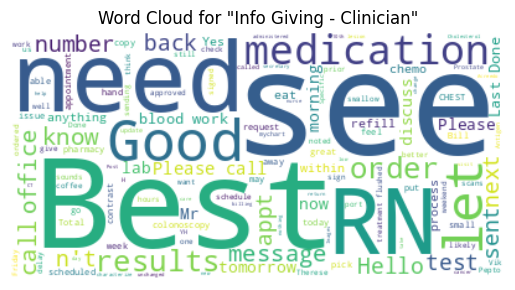

In [196]:
generate_wordcloud('Info Giving - Clinician',['Hi','will','Dr','Thank','Thanks'])

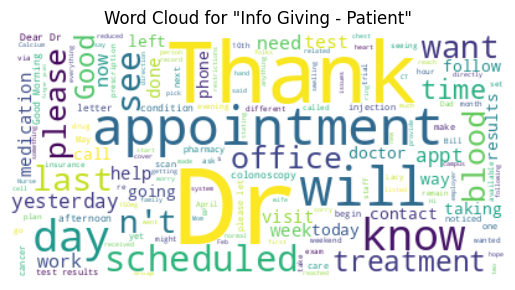

In [197]:
generate_wordcloud('Info Giving - Patient',[])

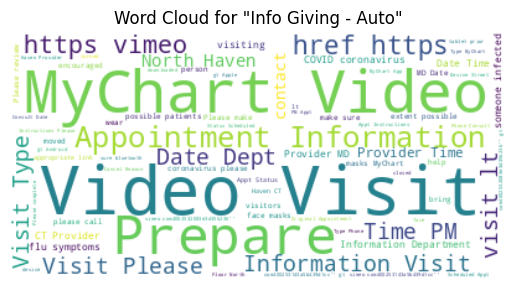

In [198]:
generate_wordcloud('Info Giving - Auto',[])

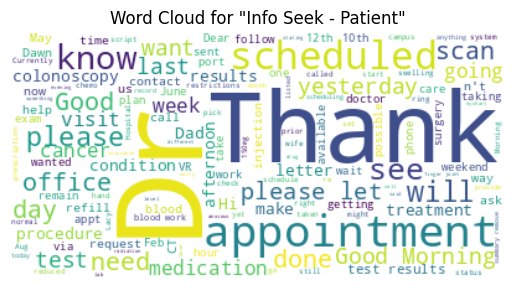

In [199]:
generate_wordcloud('Info Seek - Patient',[])

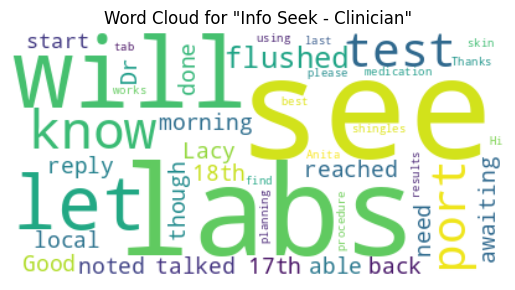

In [200]:
generate_wordcloud('Info Seek - Clinician',[])

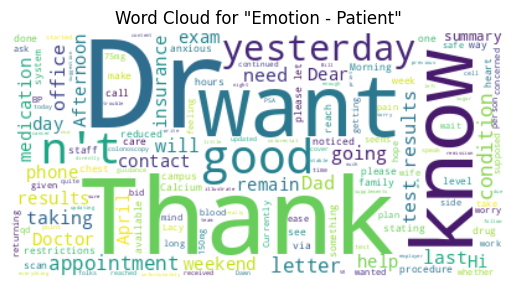

In [201]:
generate_wordcloud('Emotion - Patient',[])

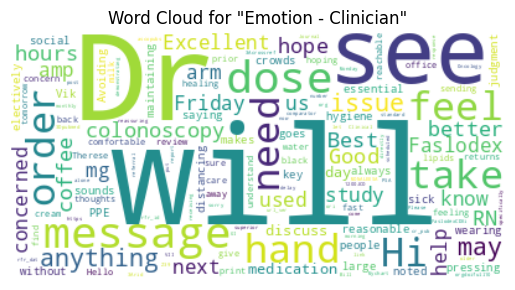

In [202]:
generate_wordcloud('Emotion - Clinician',[])

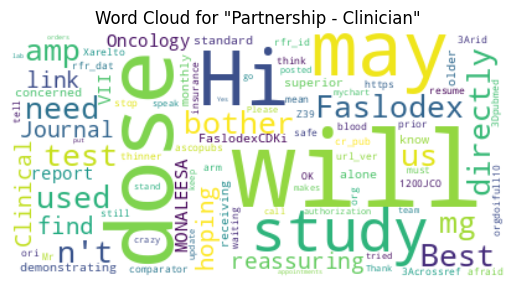

In [203]:
generate_wordcloud('Partnership - Clinician',[])

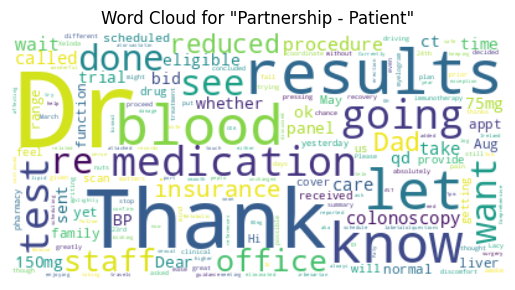

In [204]:
generate_wordcloud('Partnership - Patient',[])

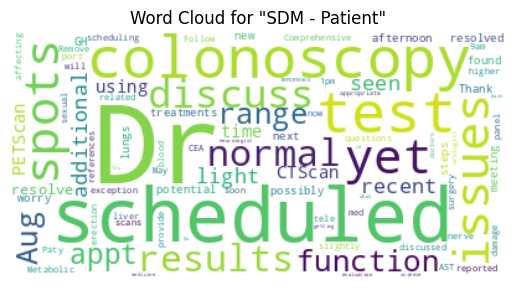

In [205]:
generate_wordcloud('SDM - Patient',[])

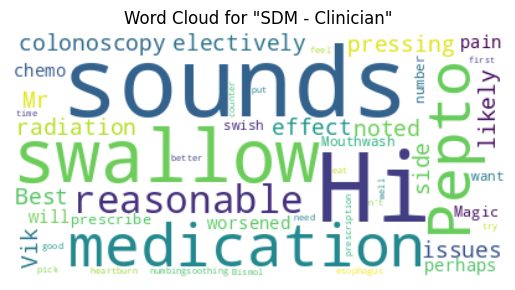

In [206]:
generate_wordcloud('SDM - Clinician',[])

In [207]:
import numpy as np

In [208]:
cat_doc={}
for cat in categories:
  string=""
  for msg in cat_msg[cat]["Quotation Content"]:
    string=string+' '+msg
  cat_doc[cat]=string

In [209]:
# no restriction of max document frequency
vectorizer = TfidfVectorizer(stop_words='english',max_features=200)
data=cat_doc.values()
X=vectorizer.fit_transform(data)
tfidf_score=X.toarray()
feature_words=vectorizer.get_feature_names_out()
tfidf_dataframe=pd.DataFrame(data=np.transpose(tfidf_score),index=feature_words,columns=categories)

In [210]:
for cat in categories:
  print(f'{cat}: ',list(tfidf_dataframe.sort_values(by=[cat],ascending=False).index[:10]))

Info Giving - Patient:  ['dr', 'appointment', 'thank', 'scheduled', 'good', 'just', 'know', 'yesterday', 'results', 'thanks']
Info Giving - Clinician:  ['dr', 'hi', 'best', 'just', 'thanks', 'work', 'good', 'need', 'sent', 'number']
Info Giving - Auto:  ['visit', 'video', 'provider', 'prepare', 'lt', 'gt', 'mychart', 'information', 'appointment', 'visits']
Info Seek - Clinician:  ['port', 'let', 'know', 'start', 'reached', 'thanks', 'morning', 'lacy', 'procedure', 'results']
Info Seek - Patient:  ['dr', 'appointment', 'scheduled', 'thank', 'good', 'know', 'thanks', 'results', 'morning', 'work']
Emotion - Patient:  ['dr', 'thank', 'results', 'letter', 'condition', 'know', 'yesterday', 'just', 'want', 'good']
Emotion - Clinician:  ['dr', 'dose', 'order', 'hand', 'just', 'hi', 'hours', 'concerned', 'arm', 'discuss']
Partnership - Clinician:  ['dose', 'directly', 'best', 'test', 'need', 'hi', 'link', 'https', 'appointments', 'concerned']
Partnership - Patient:  ['dr', 'thank', 'going', 're

In [211]:
# restrict max document frequency
vectorizer = TfidfVectorizer(stop_words='english',max_features=200,max_df=0.7)
data=cat_doc.values()
X=vectorizer.fit_transform(data)
tfidf_score=X.toarray()
feature_words=vectorizer.get_feature_names_out()
tfidf_dataframe=pd.DataFrame(data=np.transpose(tfidf_score),index=feature_words,columns=categories)

In [212]:
for cat in categories:
  print(f'{cat}: ',list(tfidf_dataframe.sort_values(by=[cat],ascending=False).index[:10]))

Info Giving - Patient:  ['appointment', 'scheduled', 'just', 'yesterday', 'results', 'thanks', 'work', 'office', 'want', 'day']
Info Giving - Clinician:  ['rn', 'best', 'just', 'thanks', 'work', 'sent', 'number', 'let', 'results', '203']
Info Giving - Auto:  ['visit', 'video', 'provider', 'prepare', 'lt', 'gt', 'mychart', 'information', 'appointment', 'visits']
Info Seek - Clinician:  ['let', 'port', 'start', 'lacy', 'thanks', 'morning', 'procedure', 'able', 'reached', 'results']
Info Seek - Patient:  ['appointment', 'scheduled', 'thanks', 'results', 'morning', 'work', 'let', 'yesterday', 'condition', 'letter']
Emotion - Patient:  ['results', 'condition', 'letter', 'yesterday', 'just', 'want', 'appointment', 'going', 'taking', 'dad']
Emotion - Clinician:  ['dose', 'message', 'order', 'hand', 'rn', 'just', 'hours', 'hope', 'concerned', 'arm']
Partnership - Clinician:  ['dose', 'directly', 'best', 'link', 'https', 'appointments', 'concerned', 'mychart', 'arm', 'prior']
Partnership - Pati